In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("../Datasets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

<AxesSubplot:>

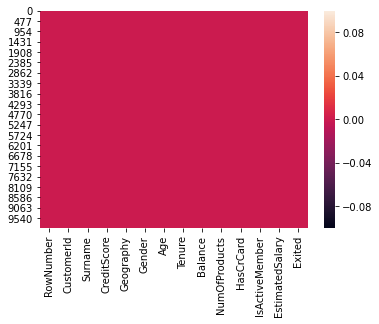

In [5]:
sns.heatmap(df.isna())
# df.isnull().sum()

<AxesSubplot:xlabel='Exited', ylabel='count'>

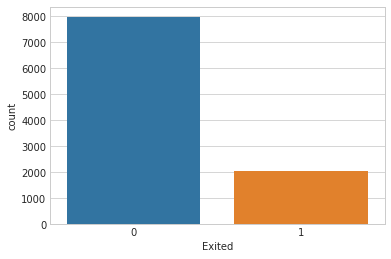

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Exited",data=df)

<AxesSubplot:>

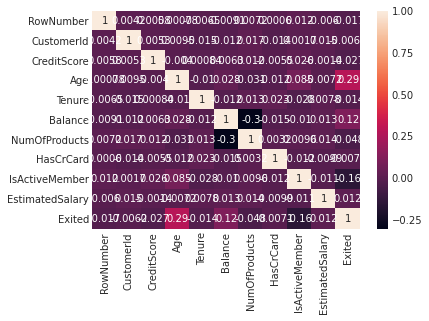

In [12]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

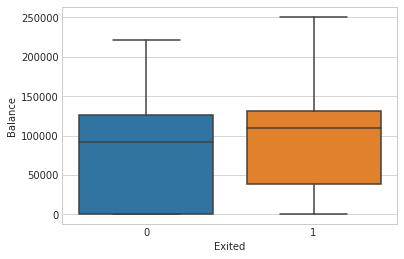

In [11]:
sns.boxplot(x="Exited",y="Balance",data=df)

In [15]:
df.drop(["CustomerId","Surname","RowNumber"],inplace=True,axis=1)

## Data preprocessing

In [16]:
#get dummies value of all categories variable
all_dummies=[]
object_cols=[]
for col in df.columns:
    if df[col].dtype=="O":
        col_dummies=pd.get_dummies(df[col],drop_first=True)
        object_cols.append(col)
        all_dummies.append(col_dummies)
    

In [18]:
# all_dummies

In [19]:
df.drop(object_cols,axis=1,inplace=True)

In [26]:
data_dummies=[]
data_dummies.append(df)
data_dummies.extend(all_dummies)
df1=pd.concat(data_dummies,axis=1)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]]=scaler.fit_transform(df1[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [35]:
x=df1.drop("Exited",axis=1)
y=df1["Exited"]

## Model training

In [29]:
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [44]:
## create ann
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(11,),activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    
])

#compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [46]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 0s 855us/step - loss: 0.4913 - accuracy: 0.7936
Epoch 2/100
219/219 [==============================] - 0s 848us/step - loss: 0.4374 - accuracy: 0.8151
Epoch 3/100
219/219 [==============================] - 0s 808us/step - loss: 0.3988 - accuracy: 0.8321
Epoch 4/100
219/219 [==============================] - 0s 836us/step - loss: 0.3794 - accuracy: 0.8429
Epoch 5/100
219/219 [==============================] - 0s 791us/step - loss: 0.3661 - accuracy: 0.8457
Epoch 6/100
219/219 [==============================] - 0s 856us/step - loss: 0.3582 - accuracy: 0.8527
Epoch 7/100
219/219 [==============================] - 0s 887us/step - loss: 0.3506 - accuracy: 0.8557
Epoch 8/100
219/219 [==============================] - 0s 833us/step - loss: 0.3504 - accuracy: 0.8576
Epoch 9/100
219/219 [==============================] - 0s 816us/step - loss: 0.3470 - accuracy: 0.8601
Epoch 10/100
219/219 [==============================] - 0s 841us/step - l

219/219 [==============================] - 0s 868us/step - loss: 0.2799 - accuracy: 0.8840
Epoch 80/100
219/219 [==============================] - 0s 838us/step - loss: 0.2779 - accuracy: 0.8861
Epoch 81/100
219/219 [==============================] - 0s 951us/step - loss: 0.2749 - accuracy: 0.8903
Epoch 82/100
219/219 [==============================] - 0s 835us/step - loss: 0.2756 - accuracy: 0.8890
Epoch 83/100
219/219 [==============================] - 0s 872us/step - loss: 0.2755 - accuracy: 0.8891
Epoch 84/100
219/219 [==============================] - 0s 967us/step - loss: 0.2747 - accuracy: 0.8876
Epoch 85/100
219/219 [==============================] - 0s 883us/step - loss: 0.2724 - accuracy: 0.8854
Epoch 86/100
219/219 [==============================] - 0s 931us/step - loss: 0.2732 - accuracy: 0.8854
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8899
Epoch 88/100
219/219 [==============================] - 0s 955us/step - loss: 0

## hyperparameter tuning

In [48]:
# !pip install keras_tuner

In [49]:
import keras_tuner as kt

In [52]:
def build_model(hp):
    model=keras.Sequential()
    
    model.add(keras.layers.Dense(
        hp.Choice("units",[8,16,32]),
        activation="relu"
    ))
    
    model.add(keras.layers.Dense(1,activation="relu"))
    
    #compile
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [53]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [55]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 2 Complete [00h 00m 01s]
val_loss: 0.5559300184249878

Best val_loss So Far: 0.5559300184249878
Total elapsed time: 00h 00m 04s
INFO:tensorflow:Oracle triggered exit
